In [ ]:
Create_Dataset_folders = 0
Retrain_Model = 1
first_run = 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from distutils.filelist import FileList
import pprint

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/5th_Year_Project/Fifth_Iteration_CNN_Live/'

In [ ]:
train_path =BASE_PATH + 'Dataset3/train/'
test_path = BASE_PATH+ 'Dataset3/test/'
valid_path = BASE_PATH+ 'Dataset3/valid/'

In [ ]:
import os
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

train_dir = train_path
valid_dir = valid_path
test_dir = test_path
batch_size = 32
num_classes = 6

def get_label_from_filename(filename):
    # Extract category labels from the file name and map them to binary labels
    if 'sqli' in filename or 'comsi' in filename:
        return "sqli"
    elif 'scan' in filename:
        return "scan"
    elif 'xss' in filename:
        return "xss"
    elif 'brute_force' in filename:
        return "brute_force"
    elif 'plc' in filename:
        return "plc"
    else:
        return "unknown"

def preprocess_data(input_dir):
    output_dir = os.path.join(input_dir + "_preprocessed")
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.mkdir(output_dir)
    for category in ["sqli", "scan", "xss", "brute_force", "plc", "unknown"]:
        os.mkdir(os.path.join(output_dir, category))
    for filename in os.listdir(input_dir):
        input_path = os.path.join(input_dir, filename)
        if os.path.isfile(input_path):
            label = get_label_from_filename(filename)
            output_path = os.path.join(output_dir, label, filename)
            img = cv2.imread(input_path)
            cv2.imwrite(output_path, img)

# preprocess_data(train_dir)
# preprocess_data(valid_dir)
# preprocess_data(test_dir)

train_dir = train_dir + "_preprocessed"
valid_dir = valid_dir + "_preprocessed"
test_dir = test_dir + "_preprocessed"

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_dataset = train_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
valid_dataset = valid_generator.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
test_dataset = test_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 6572 images belonging to 6 classes.
Found 1853 images belonging to 6 classes.
Found 893 images belonging to 6 classes.


In [ ]:
# Define the CNN model architecture

    #tf.keras.layers.Conv2D(8, input_shape=(150,150,3), activation='sigmoid'),

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8,(3,2),activation = "relu" , input_shape = (150,150,3)),
    tf.keras.layers.Conv2D(16,(3,2),activation = "relu"),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3,seed = 2023),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2023),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2023),
    tf.keras.layers.Dense(10,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2023),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.build()

In [ ]:
if Retrain_Model:
  model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 149, 8)       152       
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 148, 16)      784       
                                                                 
 conv2d_7 (Conv2D)           (None, 144, 146, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 72, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 70, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                  

In [ ]:
# Set batch size and number of epochs
batch_size = 64
epochs = 50

# Calculate steps per epoch and validation steps
train_steps = 3500 // batch_size
val_steps = 1000 // batch_size
test_steps = 500 // batch_size

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

# Train the model
history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=train_steps,
                    validation_data=valid_dataset,
                    validation_steps=val_steps)


Epoch 1/50
54/54 [==============================] - 433s 8s/step - loss: 1.4739 - acc: 0.4259 - val_loss: 1.1843 - val_acc: 0.5521
Epoch 2/50
54/54 [==============================] - 315s 6s/step - loss: 1.2693 - acc: 0.4624 - val_loss: 1.1676 - val_acc: 0.5604
Epoch 3/50
54/54 [==============================] - 224s 4s/step - loss: 1.1779 - acc: 0.5012 - val_loss: 1.1189 - val_acc: 0.5479
Epoch 4/50
54/54 [==============================] - 158s 3s/step - loss: 1.1527 - acc: 0.5295 - val_loss: 1.0799 - val_acc: 0.6042
Epoch 5/50
54/54 [==============================] - 117s 2s/step - loss: 1.1238 - acc: 0.5527 - val_loss: 1.2270 - val_acc: 0.5146
Epoch 6/50
54/54 [==============================] - 88s 2s/step - loss: 1.0940 - acc: 0.5781 - val_loss: 1.0304 - val_acc: 0.6146
Epoch 7/50
54/54 [==============================] - 67s 1s/step - loss: 1.0786 - acc: 0.5872 - val_loss: 1.1485 - val_acc: 0.5167
Epoch 8/50
54/54 [==============================] - 56s 1s/step - loss: 1.0831 - acc:

In [ ]:
if Retrain_Model: 
  model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 149, 8)       152       
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 148, 16)      784       
                                                                 
 conv2d_7 (Conv2D)           (None, 144, 146, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 72, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 70, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                  

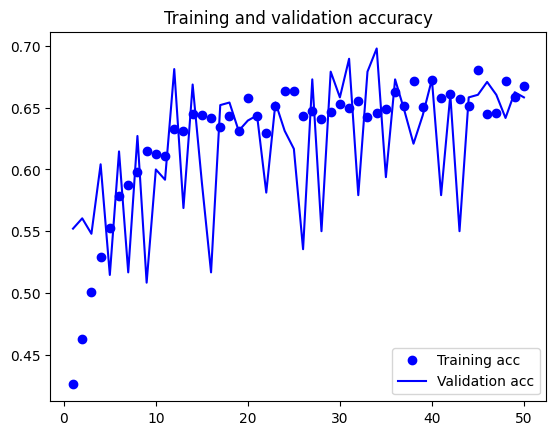

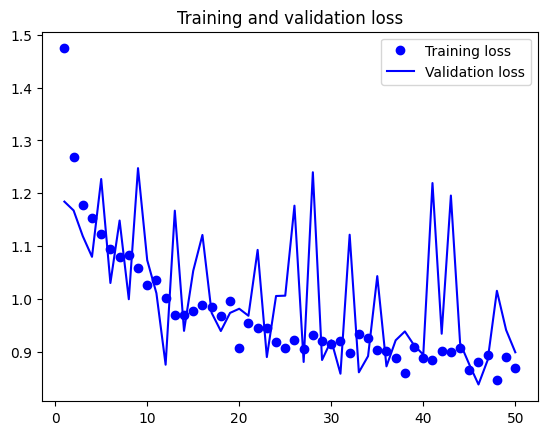

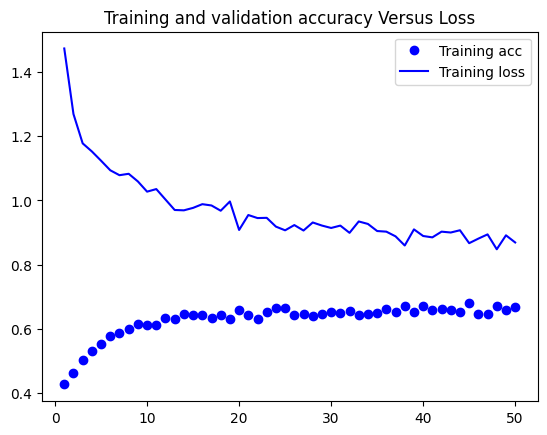

In [ ]:
if Retrain_Model:   
  # Plot the evaluation results

  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.title('Training and validation accuracy Versus Loss')
  plt.legend()
  plt.show()

58/58 [==============================] - 5s 81ms/step


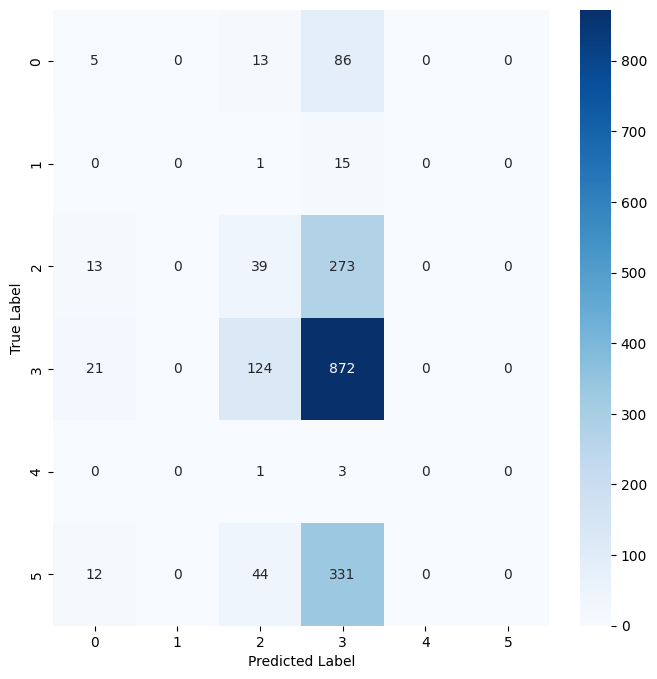

In [ ]:
import seaborn as sns

# Make predictions on the validation set
y_pred = model.predict(valid_dataset)

# Convert the predictions from one-hot encoded to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true = valid_dataset.classes

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
keras_model_path = BASE_PATH + "keras_saved_model"
model.save(keras_model_path)

In [ ]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)

In [ ]:
# Load the trained model
model = restored_keras_model

# Evaluate the model
eval_loss, eval_acc = model.evaluate(valid_dataset)
print("Evaluation loss: ", eval_loss)
print("Evaluation accuracy: ", eval_acc)

58/58 [==============================] - 5s 75ms/step - loss: 0.8691 - acc: 0.6724
Evaluation loss:  0.869084358215332
Evaluation accuracy:  0.6724231243133545


1/1 [==============================] - 0s 22ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.45      0.22      0.30       104
           1       0.00      0.00      0.00        16
           2       0.98      0.67      0.80       325
           3       0.64      0.99      0.77      1017
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00       387

    accuracy                           0.67      1853
   macro avg       0.34      0.31      0.31      1853
weighted avg       0.55      0.67      0.58      1853

Confusion Matrix
[[  23    0    2   79    0    0]
 [   1    0    0   15    0    0]
 [   9    0  218   98    0    0]
 [  11    0    1 1005    0    0]
 [   0    0    1    3    0    0]
 [   7    0    0  380    0    0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


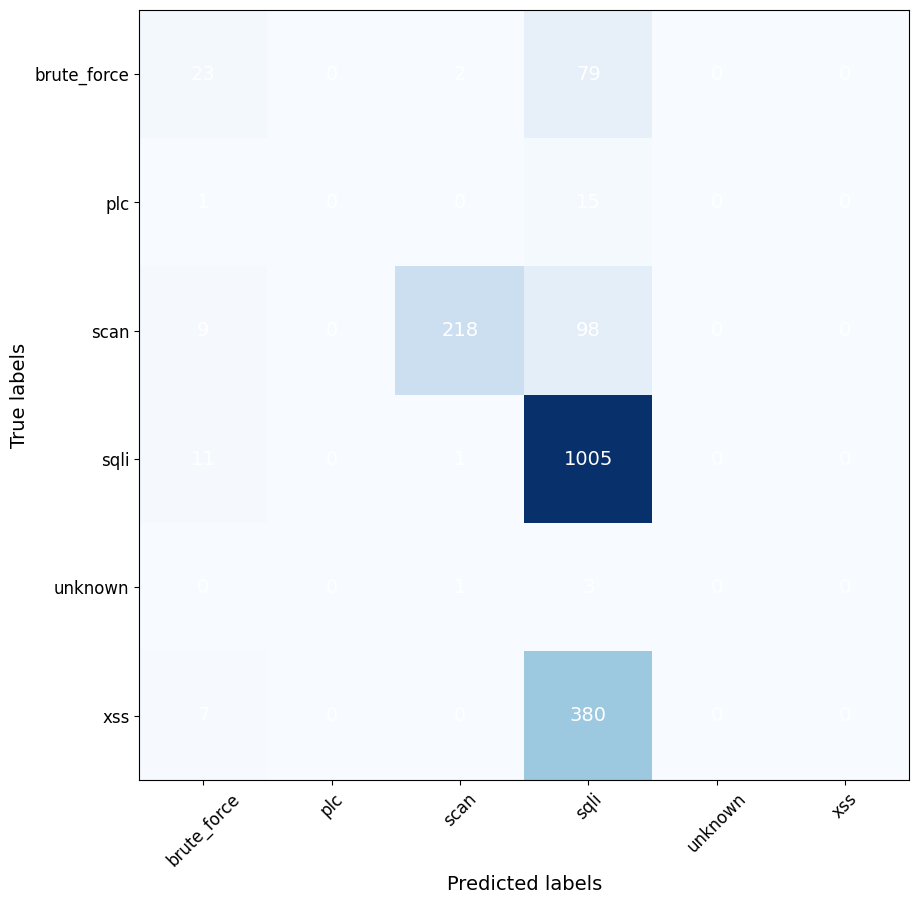

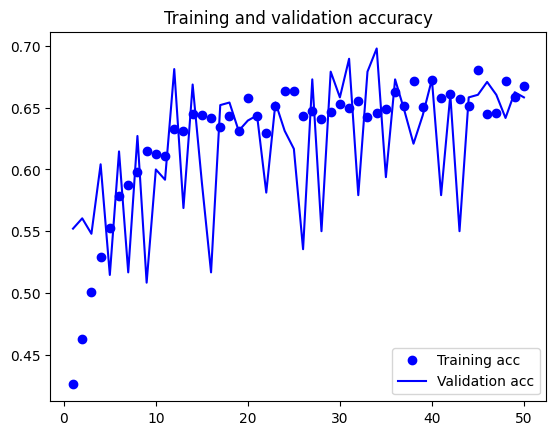

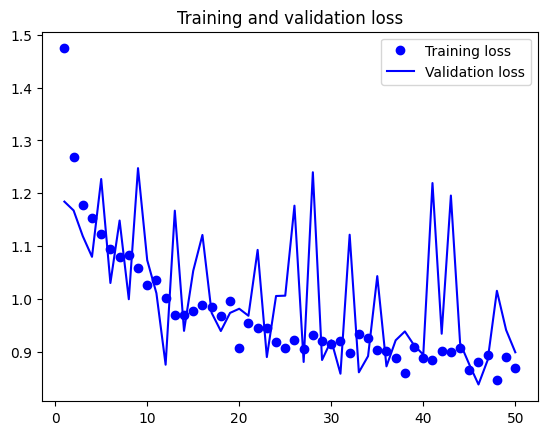

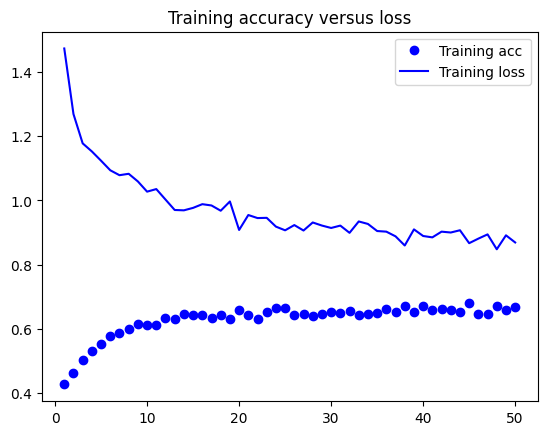

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Get the true labels and predicted labels on the validation set
Y_val = []
Y_pred = []
for i in range(len(valid_dataset)):
    x_val, y_val = valid_dataset[i]
    Y_val.extend(np.argmax(y_val, axis=1))
    Y_pred.extend(np.argmax(model.predict(x_val), axis=1))

# Generate a classification report and confusion matrix
print('Classification Report')
print(classification_report(Y_val, Y_pred))
print('Confusion Matrix')
cm = confusion_matrix(Y_val, Y_pred)
print(cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted labels', fontsize=14, color='black')
ax.set_ylabel('True labels', fontsize=14, color='black')
ax.set_xticks(range(len(valid_dataset.class_indices)))
ax.set_xticklabels(valid_dataset.class_indices.keys(), fontsize=12, rotation=45)
ax.set_yticks(range(len(valid_dataset.class_indices)))
ax.set_yticklabels(valid_dataset.class_indices.keys(), fontsize=12)
for i in range(len(valid_dataset.class_indices)):
    for j in range(len(valid_dataset.class_indices)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=14)
plt.show()

# Plot the accuracy and loss curves for training and validation sets
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training accuracy versus loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.35      0.45        48
           1       0.00      0.00      0.00         4
           2       1.00      0.65      0.79       136
           3       0.62      0.99      0.76       486
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00       215

    accuracy                           0.66       893
   macro avg       0.37      0.33      0.33       893
weighted avg       0.52      0.66      0.56       893

Confusion Matrix
[[ 17   0   0  31   0   0]
 [  0   0   0   4   0   0]
 [  2   0  88  46   0   0]
 [  4   0   0 482   0   0]
 [  0   0   0   4   0   0]
 [  5   0   0 210   0   0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


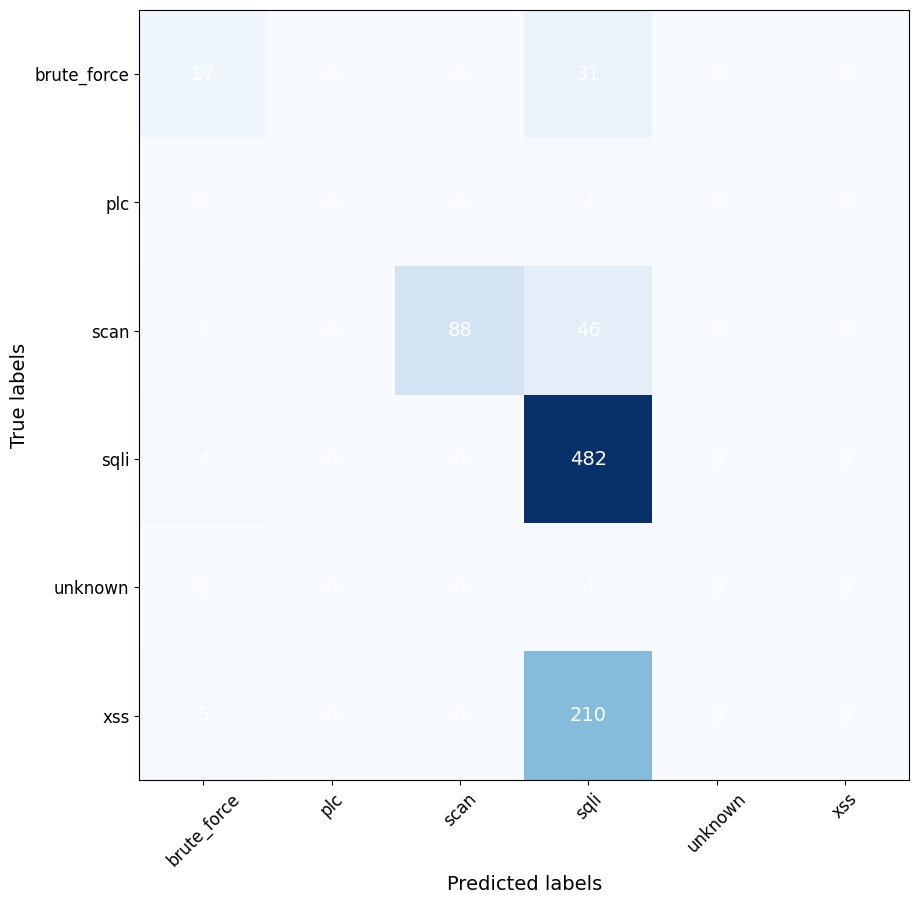

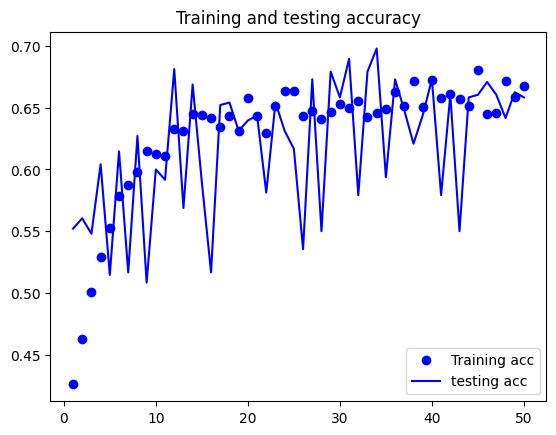

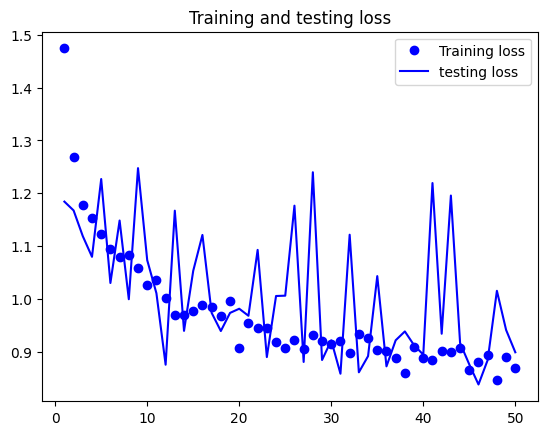

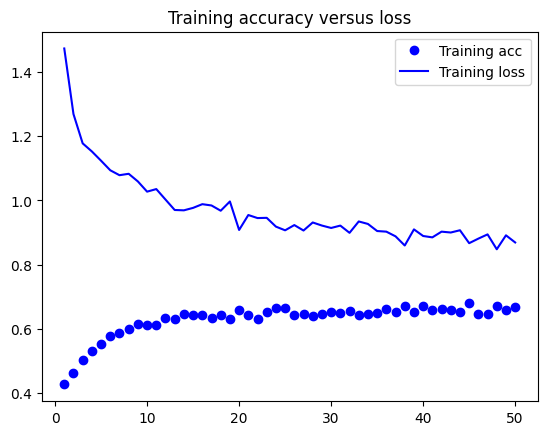

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Get the true labels and predicted labels on the validation set
Y_val = []
Y_pred = []
for i in range(len(test_dataset)):
    x_val, y_val = test_dataset[i]
    Y_val.extend(np.argmax(y_val, axis=1))
    Y_pred.extend(np.argmax(model.predict(x_val), axis=1))

# Generate a classification report and confusion matrix
print('Classification Report')
print(classification_report(Y_val, Y_pred))
print('Confusion Matrix')
cm = confusion_matrix(Y_val, Y_pred)
print(cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted labels', fontsize=14, color='black')
ax.set_ylabel('True labels', fontsize=14, color='black')
ax.set_xticks(range(len(test_dataset.class_indices)))
ax.set_xticklabels(test_dataset.class_indices.keys(), fontsize=12, rotation=45)
ax.set_yticks(range(len(test_dataset.class_indices)))
ax.set_yticklabels(test_dataset.class_indices.keys(), fontsize=12)
for i in range(len(test_dataset.class_indices)):
    for j in range(len(test_dataset.class_indices)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=14)
plt.show()

# Plot the accuracy and loss curves for training and validation sets
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='testing acc')
plt.title('Training and testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='testing loss')
plt.title('Training and testing loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training accuracy versus loss')
plt.legend()
plt.show()